In [1]:
import seagall as sgl
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import distinctipy
%matplotlib inline

/home/gabriele/miniconda3/envs/scda/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/gabriele/miniconda3/envs/scda/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/gabriele/miniconda3/envs/scda/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/gabriele/miniconda3/envs/scda/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/gabriele/miniconda3/envs/scda/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: 

Module seagall.base_dataset has been imported DEVICE --> cpu


In [2]:
adata=sc.read_h5ad("MouseBrain_GEX.h5ad")[:250, :200]
adata

View of AnnData object with n_obs × n_vars = 250 × 200
    obs: 'CellType'

Embed the data into a latent space with geometry regularised autoencoder and build the cell-to-cell graph

In [3]:
sgl.ee.geometrical_graph(adata, target_label="CellType", path="SEAGALL")

2025-11-06 15:42:44,692 - INFO - Fitting GRAE
2025-11-06 15:42:44,692 - INFO - Fitting manifold learning method...


Calculating PHATE...
  Running PHATE on 213 observations and 200 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.29 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.11 seconds.
    Calculating affinities...
    Calculated affinities in 2.12 seconds.
  Calculated graph and diffusion operator in 2.53 seconds.
  Calculating optimal t...
    Automatically selected t = 22
  Calculated optimal t in 0.05 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.06 seconds.
  Calculating metric MDS...
    SGD-MDS may not have converged: stress changed by -5.9% in final iterations. Consider increasing n_iter or adjusting learning_rate.
  Calculated metric MDS in 0.77 seconds.
Calculated PHATE in 3.41 seconds.


2025-11-06 15:42:48,107 - INFO - Fitting encoder & decoder...
2025-11-06 15:42:48,697 - INFO - Epoch 10...
2025-11-06 15:42:49,313 - INFO - Epoch 20...
2025-11-06 15:42:50,037 - INFO - Epoch 30...
2025-11-06 15:42:50,771 - INFO - Epoch 40...
2025-11-06 15:42:51,474 - INFO - Epoch 50...
2025-11-06 15:42:52,222 - INFO - Model has been early stopped at epoch 58


Train a GAT classifier to learn the target label and the GNNExplainer to extract meaninfull features. Automatic splitting the data set in training (70%), validation (10%) and test (20%) sets

In [4]:
sgl.ee.explain(adata, target_label="CellType", path="SEAGALL", hypopt=0.25)

2025-11-06 15:43:11,640 - INFO - Thu Nov  6 15:43:11 2025 Checking for HPO file
2025-11-06 15:43:11,641 - INFO - Thu Nov  6 15:43:11 2025 No HPO found. Running with 25% of cells
2025-11-06 15:43:11,642 - INFO - Creating pyg dataset based on AnnData object with target label 'CellType' and GRAE's graph. Using 25% of the cells
[I 2025-11-06 15:43:12,430] A new study created in RDB with name: SEAGALL/SEAGALL_mymodel_CellType_HPO
[I 2025-11-06 15:43:23,170] Trial 1 finished with value: 0.03333333333333333 and parameters: {'lr': 0.09958828792493057, 'weight_decay': 0.02116701993110449, 'dim_h': 224, 'heads': 8, 'dropout': 0.6}. Best is trial 1 with value: 0.03333333333333333.
[I 2025-11-06 15:43:23,612] Trial 0 finished with value: 0.12925170068027209 and parameters: {'lr': 0.07634048863196409, 'weight_decay': 0.004095124058036905, 'dim_h': 160, 'heads': 10, 'dropout': 0.1}. Best is trial 0 with value: 0.12925170068027209.
[I 2025-11-06 15:43:32,514] Trial 2 finished with value: 0.1038961038

In [5]:
adata

AnnData object with n_obs × n_vars = 250 × 200
    obs: 'CellType', 'target', 'SEAGALL_prediction', 'SEAGALL_set'
    var: 'SEAGALL_Importance_for_Deeper_Layer', 'SEAGALL_Importance_for_Ependymal_cells', 'SEAGALL_Importance_for_IPC', 'SEAGALL_Importance_for_RG_Astro_OPC', 'SEAGALL_Importance_for_Subplate', 'SEAGALL_Importance_for_Upper_Layer', 'SEAGALL_Importance_for_V_SVZ'
    uns: 'map', 'inv_map'
    obsm: 'GRAE_latent_space'
    layers: 'SEAGALL_Importance'
    obsp: 'GRAE_graph'

Show the rank-importance plot for each label

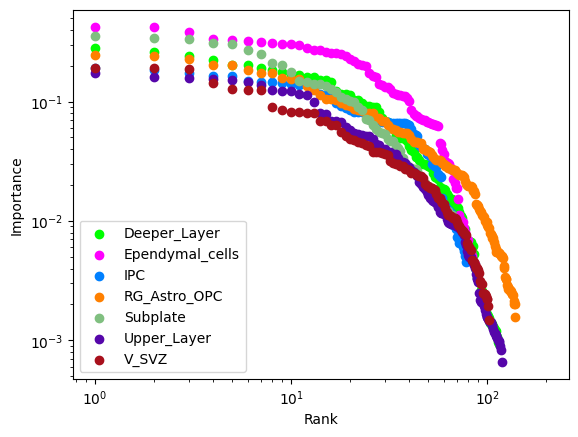

In [11]:
colors = distinctipy.get_colors(len(set(adata.obs.CellType)))
gts = {gt : c for gt, c in zip(sorted(list(set(adata.obs.CellType))), colors)}
for it in gts.items():
    plt.scatter(x=range(0, len(adata.var)), y=sorted(adata.var[f"SEAGALL_Importance_for_{it[0]}"])[::-1], c=it[1], label=it[0])
plt.legend()
plt.xlabel("Rank")
plt.ylabel("Importance")
plt.xscale("log")
plt.yscale("log")